In [4]:
!pip install huggingface_hub


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
!pip install pandas matplotlib scikit-learn
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
def read_csv(file_path):
    data = pd.read_csv("/content/Iris.csv")
    return data

In [7]:
def calculate_statistics(data):

    numerical_data = data.drop('Species', axis=1)
    stats = {
        'mean': numerical_data.mean(),
        'median': numerical_data.median(),
        'mode': data.mode().iloc[0],
        'std_dev': numerical_data.std(),
        'correlation': numerical_data.corr()
    }
    return stats

In [8]:
def multi_model_classification(data):
    X = data.drop('Species', axis=1)
    y = data['Species']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the individual models
    model1 = LogisticRegression(max_iter=1000)
    model2 = DecisionTreeClassifier()
    model3 = SVC()

    # Create the ensemble model
    ensemble_model = VotingClassifier(estimators=[('logistic_regression', model1),
                                                  ('decision_tree', model2),
                                                  ('svm', model3)],
                                      voting='hard')

    # Train the ensemble model
    ensemble_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = ensemble_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return ensemble_model, accuracy

In [9]:
def generate_plots(data):
    # Histogram
    data.hist()
    plt.suptitle('Histogram')
    plt.show()


    if data.shape[1] > 1:
        plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
        plt.title('Scatter Plot')
        plt.xlabel(data.columns[0])
        plt.ylabel(data.columns[1])
        plt.show()

    data.iloc[:, 0].plot(kind='line')
    plt.title('Line Plot')
    plt.xlabel('Index')
    plt.ylabel(data.columns[0])
    plt.show()

In [33]:
def answer_questions(data, questions):
    context = data.to_string()
    nlp = pipeline("question-answering", model="deepset/roberta-base-squad2")
    answers = []
    for question in questions:
        answer = nlp(question=question, context=context)
        answers.append(answer['answer'])
    return answers


In [12]:
file_path = 'Iris.csv'
data = read_csv(file_path)
numerical_data = data.drop('Species', axis=1)

In [13]:
# Perform and display statistics
stats = calculate_statistics(data)
for key, value in stats.items():
    print(f"{key}:\n{value}\n")

mean:
Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

median:
Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

mode:
Id                         1
SepalLengthCm            5.0
SepalWidthCm             3.0
PetalLengthCm            1.5
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object

std_dev:
Id               43.445368
SepalLengthCm     0.828066
SepalWidthCm      0.433594
PetalLengthCm     1.764420
PetalWidthCm      0.763161
dtype: float64

correlation:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     

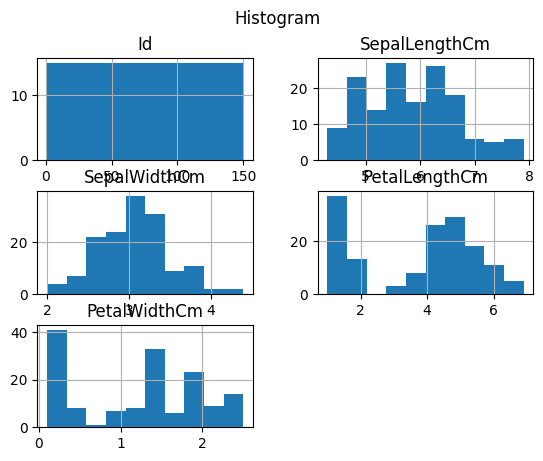

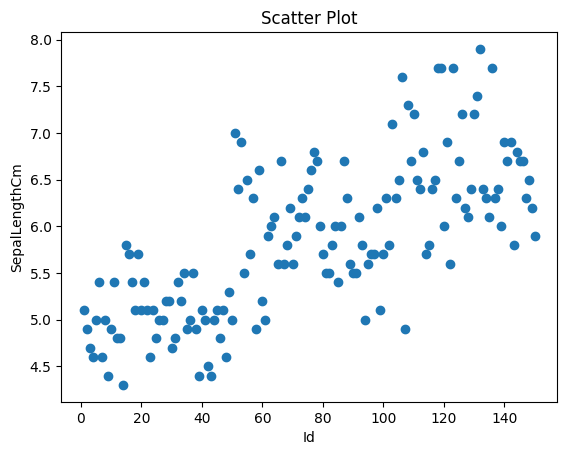

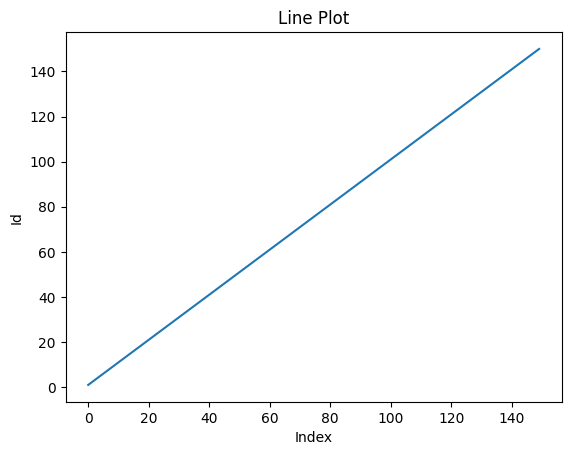

In [14]:
# Generate and display plots
generate_plots(data)

In [15]:
# Train the ensemble model and get accuracy
ensemble_model, accuracy = multi_model_classification(data)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [26]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGr

In [34]:
# Answer questions about the data
questions = ["What is the mean of sepal_length?", "what is the correlation value between sepal_length and petal_length?", "what is the median of the petal_length?","What is the accuracy for the ensemble model?"]
answers = answer_questions(numerical_data, questions)
for question, answer in zip(questions, answers):
    print(f"Q: {question}\nA: {answer}\n")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Q: What is the mean of sepal_length?
A: SepalLengthCm

Q: what is the correlation value between sepal_length and petal_length?
A: 5.1

Q: what is the median of the petal_length?
A: 4.9

Q: What is the accuracy for the ensemble model?
A: 2.8

